In [3]:
!pip install -q "dask[complete]"

In [6]:
import dask
import dask.array as da
import dask.dataframe as dd
import dask.delayed as delay

### Delayed execution

In [10]:
@delay
def inc(x):
    return x + 1

@delay
def add2(x, y):
    return x + y

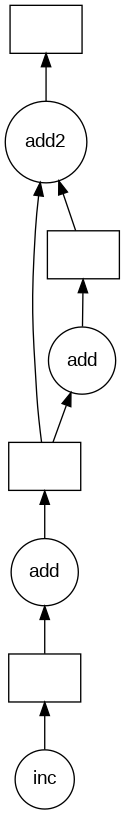

In [11]:
a = 10
b = inc(a) + 1
c = b + 2

sum = add2(b, c)

sum.visualize()

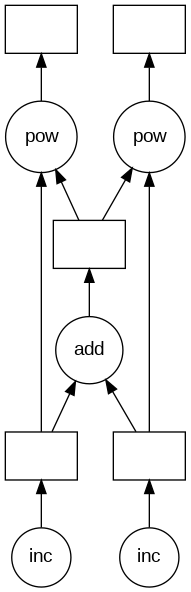

In [28]:
x = inc(20)
y = inc(10)

total = x + y
p = x ** total
q = y ** total

dask.visualize(p, q)

In [18]:
!pip install -q faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.6 MB/s eta 0:00:00


### Parallel loading

In [20]:
import pandas as pd
import numpy as np
import os
from faker import Faker

fake = Faker()

# Create a directory to store the CSV files
os.makedirs('sales_data', exist_ok=True)

# Generate data for 5 years (2020-2024)
for year in range(2020, 2025):
    # Generate data for 100 products and a few stores
    num_products = 100
    num_stores = 5
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')

    # Generate unique product names using faker
    product_names = [fake.word() for _ in range(num_products)]

    data = {
        'Date': np.tile(dates, num_stores * num_products),
        'Store': np.repeat([f'Store_{i}' for i in range(1, num_stores + 1)], len(dates) * num_products),
        'Product': np.tile(np.repeat(product_names, len(dates)), num_stores),
        'Sales': np.random.randint(10, 1000, size=len(dates) * num_stores * num_products),
        'Price': np.random.uniform(1, 100, size=len(dates) * num_stores * num_products).round(2) # Add a random price
    }
    df = pd.DataFrame(data)

    # Save the data to a CSV file
    file_path = f'sales_data/sales_{year}.csv'
    df.to_csv(file_path, index=False)
    print(f'Generated {file_path}')

Generated sales_data/sales_2020.csv
Generated sales_data/sales_2021.csv
Generated sales_data/sales_2022.csv
Generated sales_data/sales_2023.csv
Generated sales_data/sales_2024.csv


Delayed('max-69247258-150f-4e28-adfb-bdb06a4b6a86')


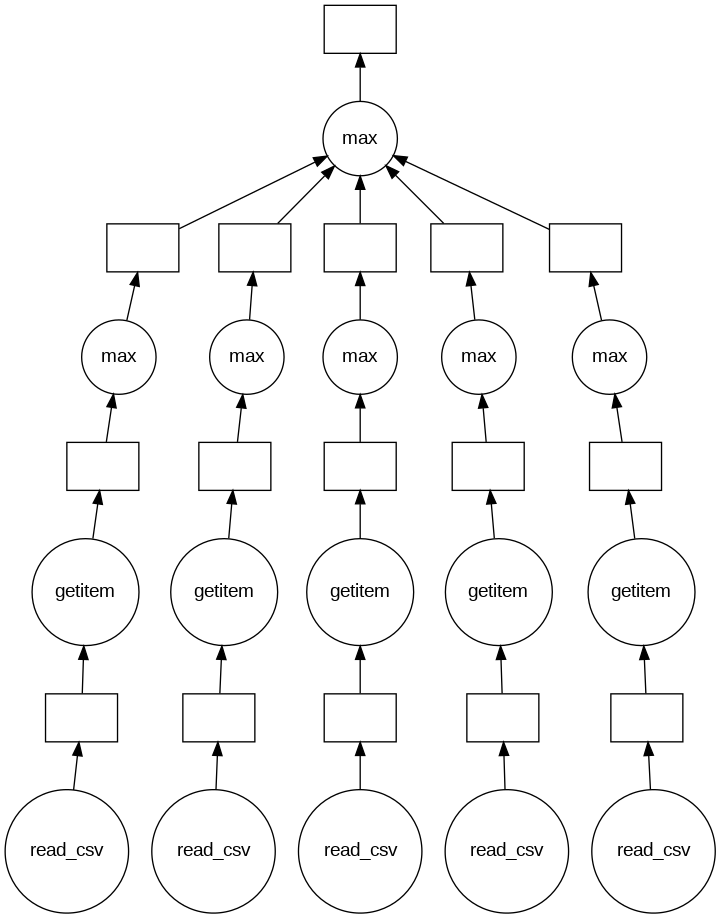

In [26]:
import pandas as pd

mprices = []

for year in range(2020, 2025):
    file_path = f'sales_data/sales_{year}.csv'
    df = delay(pd.read_csv)(file_path)
    max_price = df['Price'].max()
    mprices.append(max_price)

maximum = delay(max)(mprices)
print(maximum)
maximum.visualize()


In [27]:
print(maximum.compute())

100.0
